#### I was trying to recreate the Bayesian Updating from par 0.5.1 using the data sample from the paper.
#### data given= 3,3,4...
### $P(\mu|N)=\frac{e^{-\mu}\mu^{N}}{N!}\frac{P(\mu)}{P(N)}$ 
#### let $P(\mu)=1$ and $N_{1}=3$ and I will ignore the normalization factor. 

In [65]:
import numpy as np
s = np.random.poisson(3, 10000)
s

array([3, 1, 4, ..., 3, 4, 5])

(array([3.92307692e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.13000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.69076923e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.69615385e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.30538462e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 7.83846154e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.15384615e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.74615385e-01, 0.00000000e+00, 0.000000

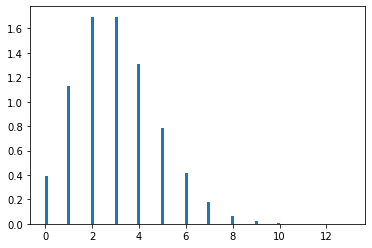

In [66]:
import matplotlib.pyplot as plt
plt.hist(s, 100, density=True)

In [67]:
print(s[0], s[1], s[2])

3 1 4


### $P(\mu|N1)=\frac{e^{-\mu}\mu^{1}}{1!}$ 

Text(0.5, 1.0, '$P(\\mu|N1)$')

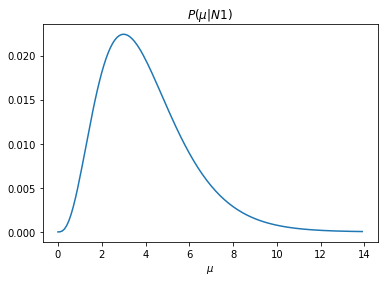

In [68]:
def power(my_list,N):
    return [ x**N for x in my_list ]
import matplotlib.pyplot as plt 
import numpy as np 
from math import *
m = np.arange(0, 14, 0.1) 
N1 = s[0]
#pow(m,N1)
P_m_N1 = np.exp(-m)*power(m,N1)/factorial(N1)
P_m_N1 = [float(i)/sum(P_m_N1) for i in P_m_N1]
plt.plot(m, P_m_N1)
plt.xlabel('$\mu$') 
plt.title('$P(\mu|N1)$') 

Let's add one more data point N=3 
$P(\mu|N1,N2)= \frac{e^{-\mu}\mu^{3}}{3!}\frac{e^{-\mu}\mu^{1}}{1!}$

Text(0.5, 0, '$\\mu$')

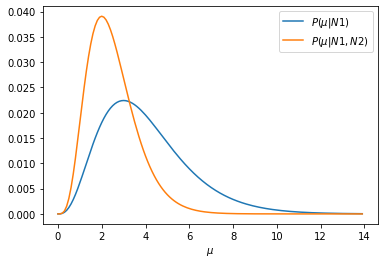

In [69]:
import matplotlib.pyplot as plt 
import numpy as np 
from math import *
#m = np.arange(0, 7, 0.1) 
N2 = s[1]
#pow(m,N1)
P_m_N2 = P_m_N1*np.exp(-m)*power(m,N2)/factorial(N2)
P_m_N2 = [float(i)/sum(P_m_N2) for i in P_m_N2]
plt.plot(m, P_m_N1, label = '$P(\mu|N1)$')
plt.plot(m, P_m_N2, label = '$P(\mu|N1,N2)$')
plt.legend()
plt.xlabel('$\mu$') 

#### Let's add one more data point $N_{3}=4$
### $P(\mu|N1,N2,N3)= \frac{e^{-\mu}\mu^{3}}{3!}\frac{e^{-\mu}\mu^{3}}{3!}\frac{e^{-\mu}\mu^{4}}{4!}$

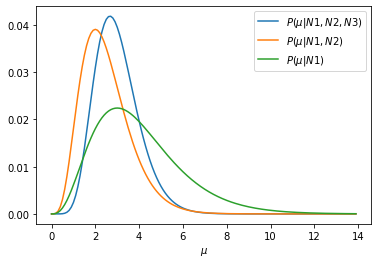

In [70]:
N3 = s[2]
P_m_N3 = P_m_N2*(np.exp(-m)*power(m,N3))/factorial(N3)
P_m_N3= [float(i)/sum(P_m_N3) for i in P_m_N3]
plt.plot(m, P_m_N3, label = '$P(\mu|N1,N2,N3)$')
plt.plot(m, P_m_N2, label = '$P(\mu|N1,N2)$')
plt.plot(m, P_m_N1, label = '$P(\mu|N1)$')
plt.xlabel('$\mu$') 
plt.legend()

#### The distribution bacame more narrow around $\approx \mu$

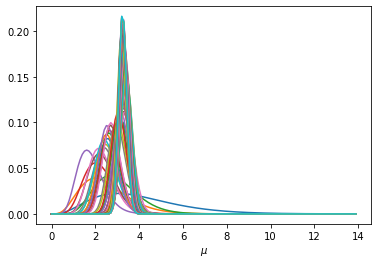

In [71]:
m = np.arange(0, 14, 0.1) 
P_m_N = [1]*140
#print(P_m_N)
for n in range(100): 
    N = s[n]
    #print(n,N)
    P_m_N = P_m_N*(np.exp(-m)*power(m,N))/factorial(N)
    #print(P_m_N)
    P_m_N = [float(i)/sum(P_m_N) for i in P_m_N]
    plt.plot(m, P_m_N)
    plt.xlabel('$\mu$') 